In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as Imbpipeline
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,precision_recall_curve,auc

In [2]:
df = pd.read_csv("heartdisease.csv")
df.head(2)

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0


In [3]:
#Univariate Analysis
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Diabetes,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0
Veggies,253680.0,0.811420,0.391175,0.0,1.0,1.0,1.0,1.0
HvyAlcoholConsump,253680.0,0.056197,0.230302,0.0,0.0,0.0,0.0,1.0


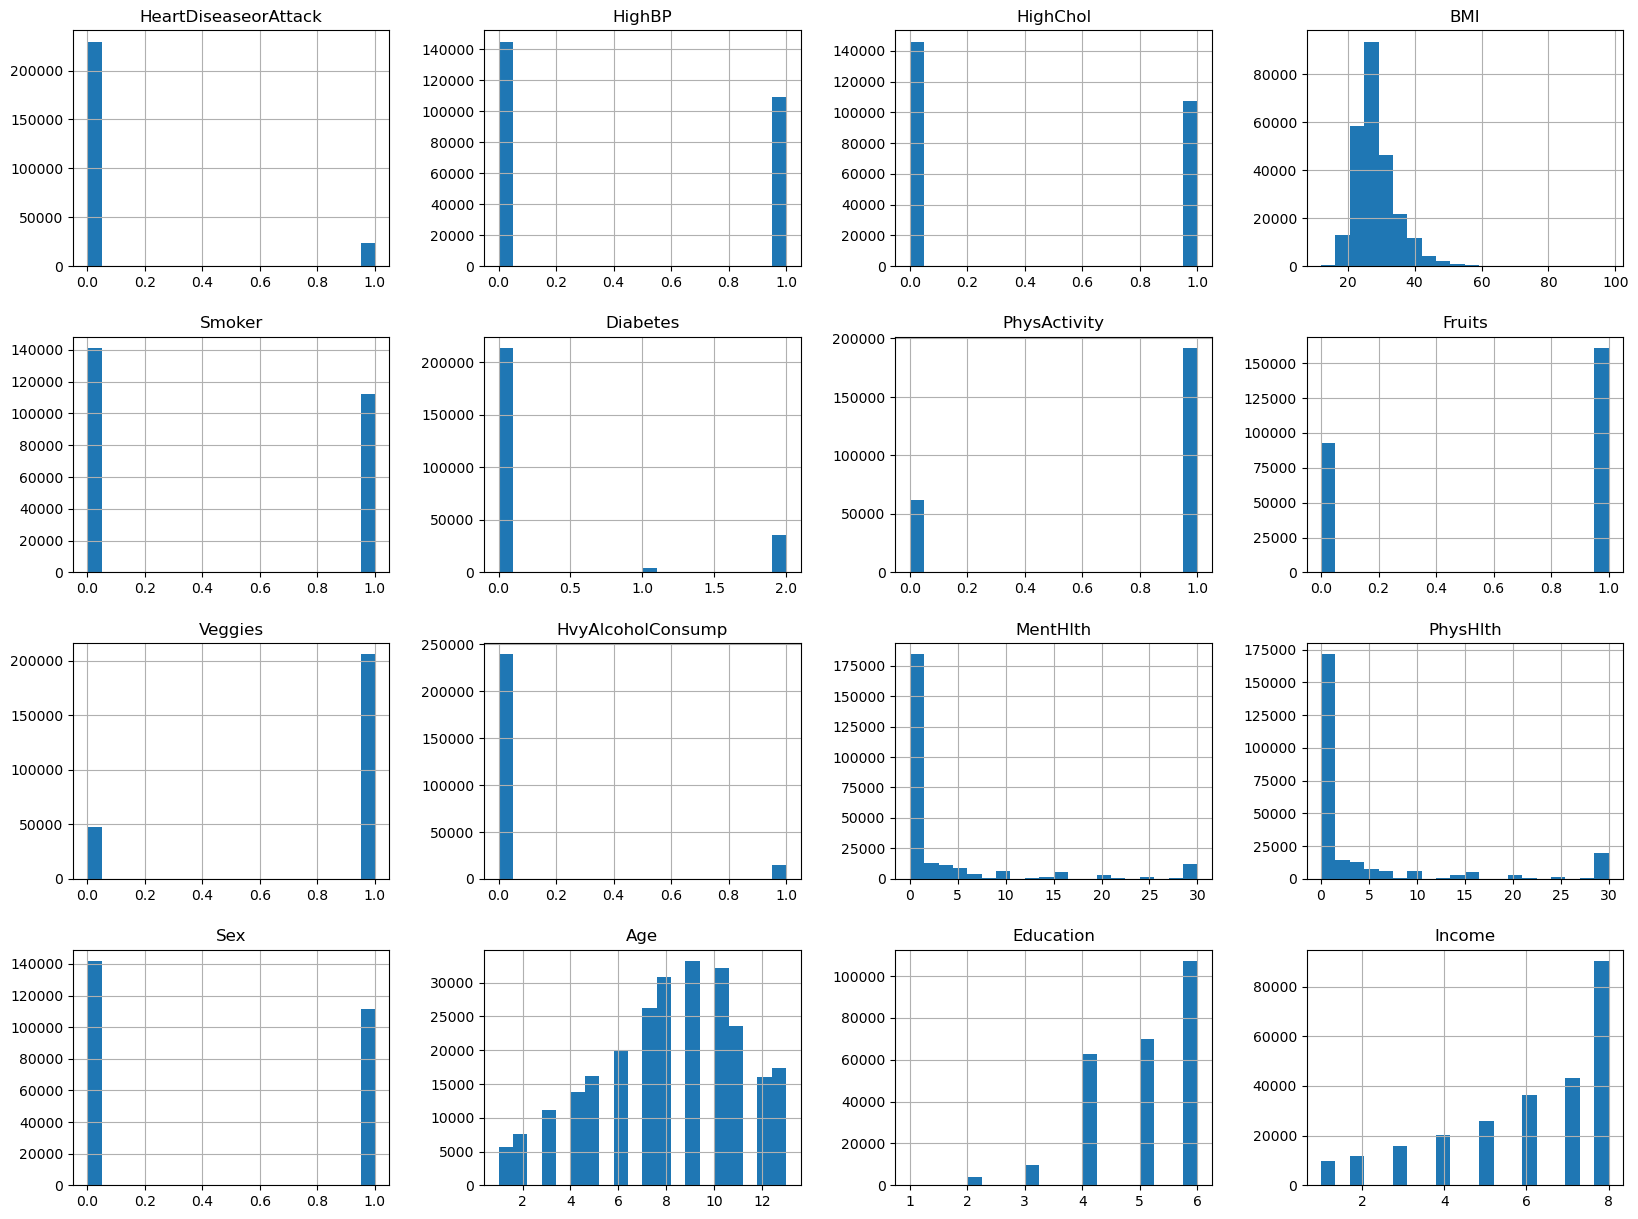

In [4]:
#Plotting the Univariate Analysis
df.hist(bins=20, figsize=(20, 15))
plt.show()

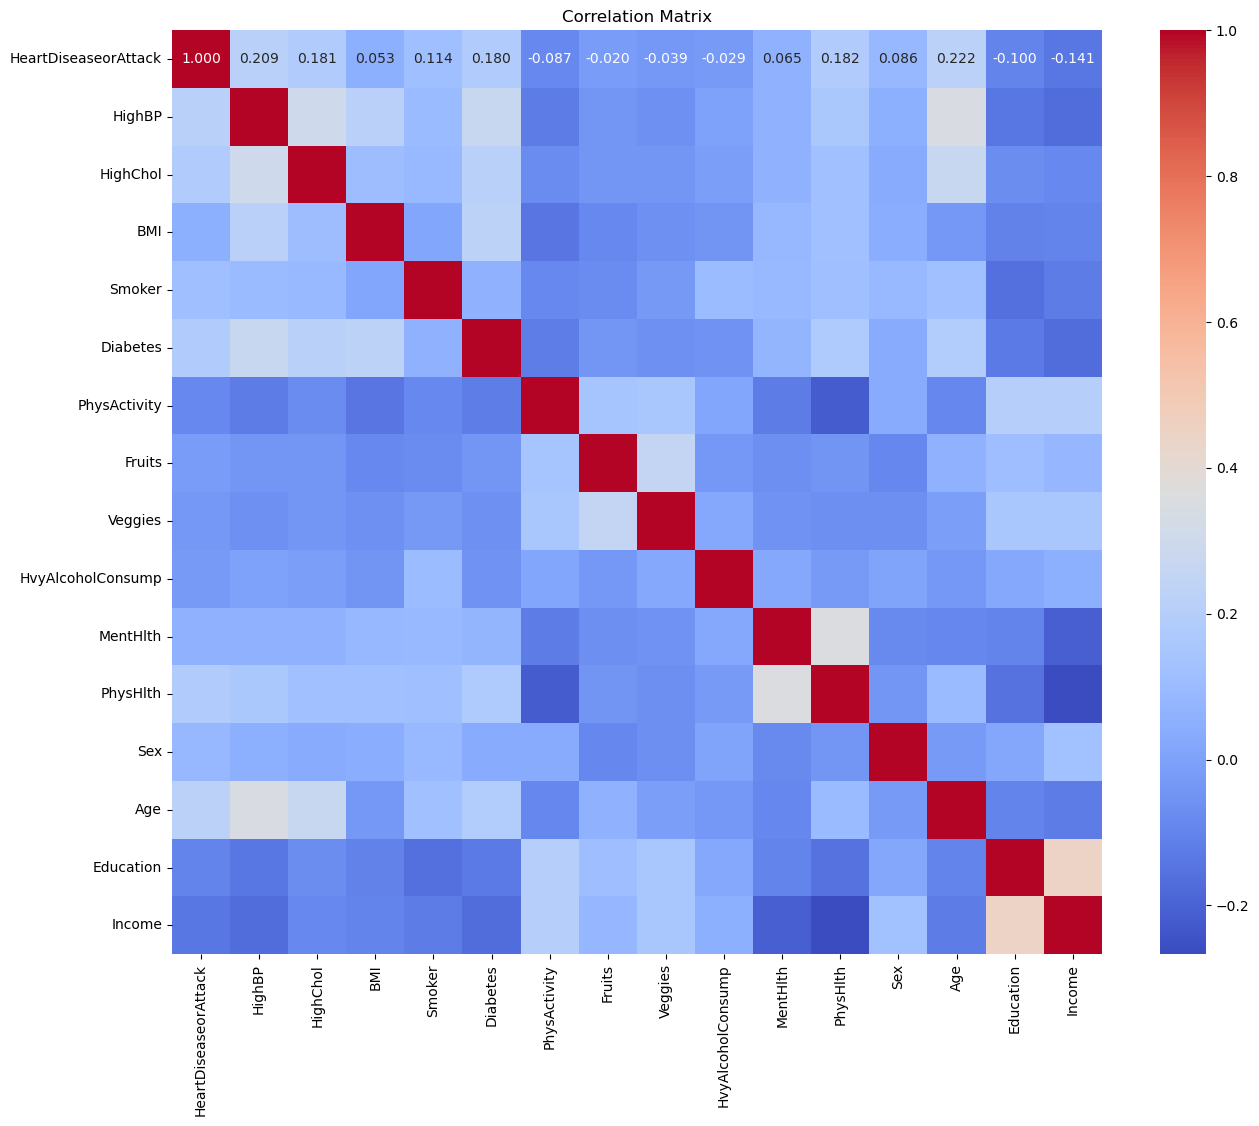

In [5]:
# MultiVariate analysis
corr_matrix = df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation Matrix')
plt.show()

In [6]:
#3. To determine if new features can be created, based ont he given data.

X = df.drop("HeartDiseaseorAttack",axis = 1)
y = df["HeartDiseaseorAttack"]

smote = SMOTE(random_state = 42)
X_res,y_res = smote.fit_resample(X,y)

#Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res, test_size = 0.2,random_state = 30)

In [7]:
X_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459574 entries, 0 to 459573
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   HighBP             459574 non-null  float64
 1   HighChol           459574 non-null  float64
 2   BMI                459574 non-null  float64
 3   Smoker             459574 non-null  float64
 4   Diabetes           459574 non-null  float64
 5   PhysActivity       459574 non-null  float64
 6   Fruits             459574 non-null  float64
 7   Veggies            459574 non-null  float64
 8   HvyAlcoholConsump  459574 non-null  float64
 9   MentHlth           459574 non-null  float64
 10  PhysHlth           459574 non-null  float64
 11  Sex                459574 non-null  float64
 12  Age                459574 non-null  float64
 13  Education          459574 non-null  float64
 14  Income             459574 non-null  float64
dtypes: float64(15)
memory usage: 52.6 MB


In [8]:
y_res.info()

<class 'pandas.core.series.Series'>
RangeIndex: 459574 entries, 0 to 459573
Series name: HeartDiseaseorAttack
Non-Null Count   Dtype  
--------------   -----  
459574 non-null  float64
dtypes: float64(1)
memory usage: 3.5 MB


In [9]:
models = {
    "Logistic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier()   
}

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model:Logistic Regression
              precision    recall  f1-score   support

         0.0       0.78      0.73      0.75     46042
         1.0       0.74      0.80      0.77     45873

    accuracy                           0.76     91915
   macro avg       0.76      0.76      0.76     91915
weighted avg       0.76      0.76      0.76     91915



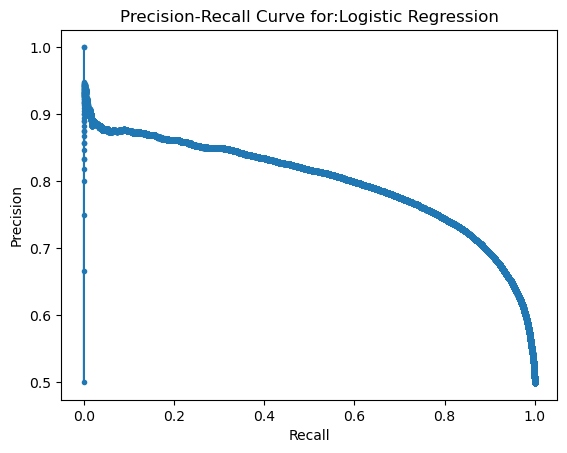

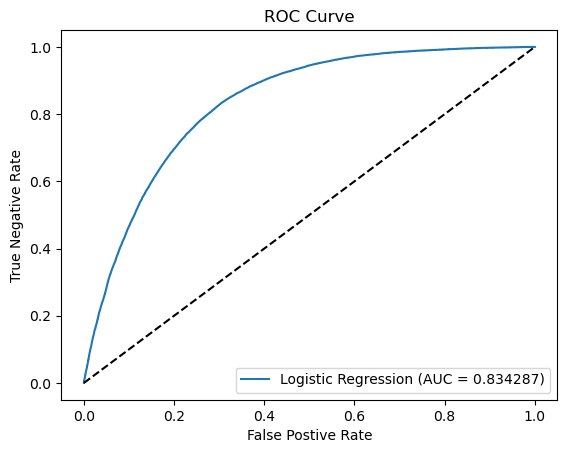

Model:Decision Tree
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91     46042
         1.0       0.91      0.92      0.91     45873

    accuracy                           0.91     91915
   macro avg       0.91      0.91      0.91     91915
weighted avg       0.91      0.91      0.91     91915



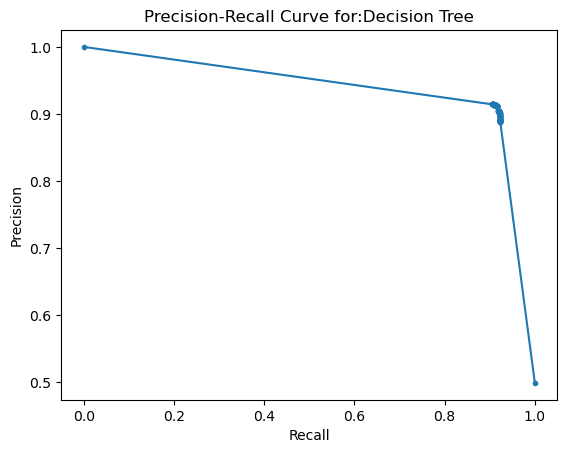

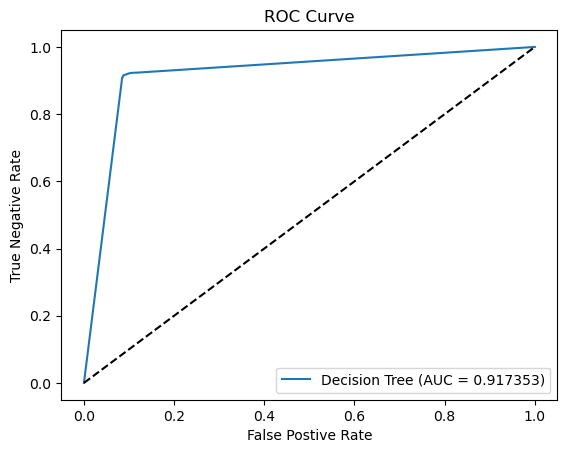

Model:Random Forest
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94     46042
         1.0       0.97      0.91      0.94     45873

    accuracy                           0.94     91915
   macro avg       0.94      0.94      0.94     91915
weighted avg       0.94      0.94      0.94     91915



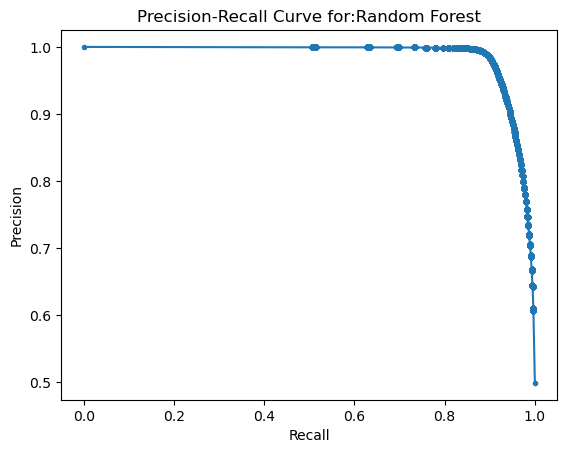

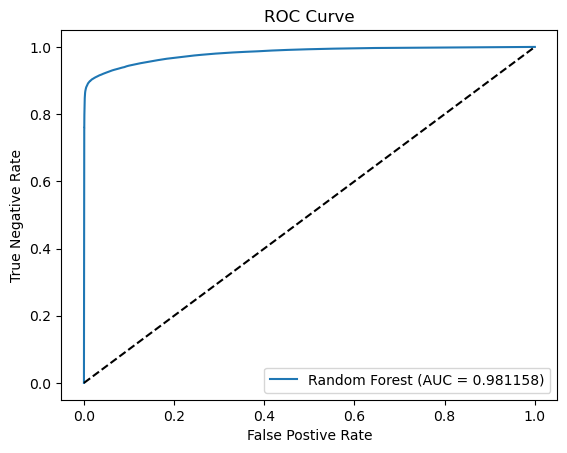

In [10]:
#Train and evaluate each model
for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test) 

    #Print Classification Report
    print(f'Model:{name}')
    print(classification_report(y_test,y_pred))

    #Precision-recall Curve
    y_scores = model.predict_proba(X_test)[:,1]
    precision, recall, threshold = precision_recall_curve(y_test, y_scores)
    plt.plot(recall, precision, marker=".")
    plt.title(f'Precision-Recall Curve for:{name}')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.show()


    #ROC Curve
    fpr,tpr,_  = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr, label=f'{name} (AUC = {roc_auc:2f})')
    plt.plot([0,1],[0,1],"k--")
    plt.title("ROC Curve")
    plt.xlabel("False Postive Rate")
    plt.ylabel("True Negative Rate")
    plt.legend(loc="lower right")
    plt.show()

In [11]:
importance = models["Random Forest"].feature_importances_
features_name = X.columns
feature_importance_df = pd.DataFrame({"feature":features_name, "importance":importance}).sort_values(by="importance",ascending=False)
print(feature_importance_df)

              feature  importance
12                Age    0.136995
0              HighBP    0.135634
1            HighChol    0.130994
3              Smoker    0.086956
2                 BMI    0.082342
11                Sex    0.082240
14             Income    0.070818
13          Education    0.049693
5        PhysActivity    0.047196
10           PhysHlth    0.043068
6              Fruits    0.038069
4            Diabetes    0.035318
7             Veggies    0.026208
9            MentHlth    0.024388
8   HvyAlcoholConsump    0.010081


In [12]:
dt_pipeline = Imbpipeline([
    ("Smote",SMOTE(random_state = 40)),
    ("Scaler",StandardScaler()),
    ("Classifier",DecisionTreeClassifier(random_state = 40))
])

In [13]:
rf_pipeline = Imbpipeline([
    ("Smote",SMOTE(random_state = 40)),
    ("Scaler",StandardScaler()),
    ("Classifier",RandomForestClassifier(random_state = 40))
])

In [14]:
lr_pipeline = Imbpipeline([
    ("Smote",SMOTE(random_state = 40)),
    ("Scaler",StandardScaler()),
    ("Classifier",LogisticRegression(random_state = 40))
])

In [15]:
# Train the pipelines
rf_pipeline.fit(X_train, y_train)
dt_pipeline.fit(X_train, y_train)
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('Smote', SMOTE(random_state=40)), ('Scaler', StandardScaler()),
                ('Classifier', LogisticRegression(random_state=40))])

In [16]:
# Make predictions
y_pred_rf = rf_pipeline.predict(X_test)
y_pred_dt = dt_pipeline.predict(X_test)
y_pred_lr = lr_pipeline.predict(X_test)

              Feature  RandomForest  DecisionTree  LogisticRegression  \
0              HighBP      0.139764      0.288861            0.115841   
12                Age      0.137140      0.128660            0.233041   
1            HighChol      0.131581      0.118944            0.112666   
11                Sex      0.080680      0.076514            0.127276   
3              Smoker      0.086285      0.072008            0.072820   
14             Income      0.068024      0.056085            0.076544   
10           PhysHlth      0.045451      0.036386            0.093029   
2                 BMI      0.082444      0.073319            0.009999   
4            Diabetes      0.034995      0.015451            0.053916   
13          Education      0.050771      0.036592            0.010122   
9            MentHlth      0.024532      0.022689            0.037664   
5        PhysActivity      0.044144      0.025344            0.005142   
6              Fruits      0.035913      0.023470  

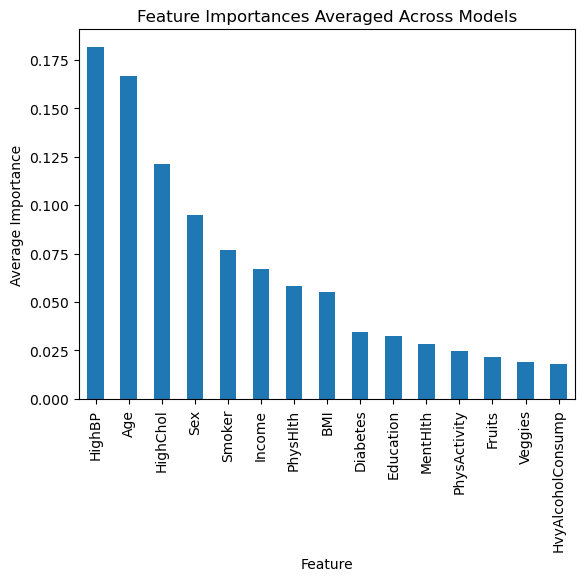

In [20]:
# Extract feature importances
rf_importances = rf_pipeline.named_steps['Classifier'].feature_importances_
dt_importances = dt_pipeline.named_steps['Classifier'].feature_importances_
lr_importances = np.abs(lr_pipeline.named_steps['Classifier'].coef_[0])  # Absolute value of coefficients

# Combine feature importances into a DataFrame
feature_names = X.columns
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'RandomForest': rf_importances,
    'DecisionTree': dt_importances,
    'LogisticRegression': lr_importances
})

# Normalize the importances for comparison
importances_df['RandomForest'] = importances_df['RandomForest'] / importances_df['RandomForest'].sum()
importances_df['DecisionTree'] = importances_df['DecisionTree'] / importances_df['DecisionTree'].sum()
importances_df['LogisticRegression'] = importances_df['LogisticRegression'] / importances_df['LogisticRegression'].sum()

# Average the importances across models
importances_df['AverageImportance'] = importances_df[['RandomForest', 'DecisionTree', 'LogisticRegression']].mean(axis=1)

# Sort by average importance
importances_df = importances_df.sort_values(by='AverageImportance', ascending=False)

# Display the most important features
print(importances_df)

# Optionally, visualize the feature importances
importances_df.plot(kind='bar', x='Feature', y='AverageImportance', legend=False)
plt.title('Feature Importances Averaged Across Models')
plt.ylabel('Average Importance')
plt.show()